### 5) Consider the harmonic oscillator $d2/dt2x=−x$. Find a controller which drives  the system from the origin to the point (1,0) in π time. Repeat the exercise if instead $d2/dt2x=−4x$

Consider the system 
$$\Large \dot x = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} x + \begin{pmatrix} 0 \\ 1 \end{pmatrix} u.$$

We seek for a control which drives the state $(0,0)$ to the state $ (1,0) $ in $2\pi$ seconds.

To begin, let's plot the solution with $u \equiv 0$ and $x(0) = (0,1)$.

In [2]:
import numpy as np
import matplotlib.animation as animation

%matplotlib

n = 100
t = np.linspace(0,np.pi,n)
x = np.sin(t)
y = np.cos(t)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111,autoscale_on=False, xlim=(-1.5,1.5),ylim=(-1.5,1.5))
ax.set_aspect('equal', adjustable='box')

mass, = ax.plot([],[],linestyle='None',marker='o',\
                 markersize=20,markeredgecolor='k',\
                 color='orange',markeredgewidth=2)

line, = ax.plot([],[],'o-',color='orange',lw=4,\
                markersize=6,markeredgecolor='k',\
                markerfacecolor='k')
def init():
    mass.set_data([],[])
    line.set_data([],[])
    return line, mass

def animate(i):
    mass.set_data([x[i]],[0.])
    line.set_data([0,x[i]],[0.,0.])
    return line, mass

ani_a = animation.FuncAnimation(fig, animate, \
         np.arange(1,n), \
         interval=40,blit=False,init_func=init)

plt.show()

Using matplotlib backend: MacOSX


In this case the matrix exponential is given by
$$ e^{As} = \begin{pmatrix} \cos(s) & \sin(s) \\ -\sin(s) & \cos(s) \end{pmatrix}$$.
Thus we may compute
$$ e^{A(\pi-\tau)}B = \begin{pmatrix} \sin(\pi-\tau) \\ \cos(\pi-\tau) \end{pmatrix}$$.
This implies that the controllability Grammian is given by
$$W_r(0,\pi) = \int_0^{\pi} \begin{pmatrix} \sin^2(\pi-\tau) & \sin(\pi-\tau)\cos(\pi-\tau) \\ \sin(\pi-\tau) \cos(\pi-\tau) & \cos^2(\pi-\tau)\end{pmatrix} \,d\tau = \begin{pmatrix} \pi/2 & 0 \\ 0 & \pi/2 \end{pmatrix}.
$$
In turn we use the formulas
$$
W_r \eta = x_1 = (1,0),\qquad u(t) = B^T e^{A^T(\pi-t)} \eta = \frac{2}{\pi} \sin(\pi-t).
$$
We then use odeint to solve the equation $\dot x = Ax + Bu$, and then display the output as an animation.

In [3]:
def RHS(y, t):
    
    A = np.array([[0,1],[-1,0]])
    
    B = np.array([0,1])
    
    u = 2*np.sin(np.pi - t)/np.pi
    
    dydt = A.dot(y) + B*u
    return dydt

from scipy.integrate import odeint

y0 = np.array([0,0])

sol = odeint(RHS, y0, t)

x = sol[:,0]

print(sol[-1,0])
print(sol[-1,1])



0.9999999917283572
5.090050272243962e-08


In [4]:
fig = plt.figure()
ax = fig.add_subplot(111,autoscale_on=False, xlim=(-1.5,1.5),ylim=(-1.5,1.5))
ax.set_aspect('equal', adjustable='box')

mass, = ax.plot([],[],linestyle='None',marker='o',\
                 markersize=20,markeredgecolor='k',\
                 color='orange',markeredgewidth=2)

line, = ax.plot([],[],'o-',color='orange',lw=4,\
                markersize=6,markeredgecolor='k',\
                markerfacecolor='k')
def init():
    mass.set_data([],[])
    line.set_data([],[])
    return line, mass

def animate(i):
    mass.set_data([x[i]],[0.])
    line.set_data([0,x[i]],[0.,0.])
    return line, mass

ani_a = animation.FuncAnimation(fig, animate, \
         np.arange(1,n), \
         interval=40,blit=False,init_func=init)

plt.show()

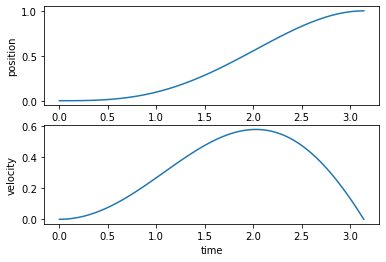

In [7]:
%matplotlib inline

fig, axs = plt.subplots(2, 1)
axs[0].plot(t,sol[:,0])
axs[0].set_ylabel('position')
axs[0].set_xlabel('time')
axs[1].plot(t,sol[:,1])
axs[1].set_ylabel('velocity')
axs[1].set_xlabel('time')

plt.show()

Next, we consider $\frac{d^2x}{dt^2} = -4x$. Firstly, we linearlize this system. 
The linearlized system 
$$\Large \dot x = \begin{bmatrix} 0 & 1 \\ -4 & 0 \end{bmatrix} x + \begin{pmatrix} 0 \\ 1 \end{pmatrix} u.$$

We seek for a control which drives the state $(0,0)$ to the state $ (1,0) $ in $2\pi$ seconds.

To begin, let's plot the solution with $u \equiv 0$ and $x(0) = (0,0)$.

In [5]:
%matplotlib
n = 100
t = np.linspace(0,np.pi,n)
x = np.sin(2*t)
y = 2*np.cos(2*t)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111,autoscale_on=False, xlim=(-1.5,1.5),ylim=(-1.5,1.5))
ax.set_aspect('equal', adjustable='box')

mass, = ax.plot([],[],linestyle='None',marker='o',\
                 markersize=20,markeredgecolor='k',\
                 color='orange',markeredgewidth=2)

line, = ax.plot([],[],'o-',color='orange',lw=4,\
                markersize=6,markeredgecolor='k',\
                markerfacecolor='k')
def init():
    mass.set_data([],[])
    line.set_data([],[])
    return line, mass

def animate(i):
    mass.set_data([x[i]],[0.])
    line.set_data([0,x[i]],[0.,0.])
    return line, mass

ani_a = animation.FuncAnimation(fig, animate, \
         np.arange(1,n), \
         interval=40,blit=False,init_func=init)

plt.show()

Using matplotlib backend: MacOSX


In this case the matrix exponential is given by
$$ e^{As} = \begin{pmatrix} \cos(2s) & \sin(2s)/2 \\ -2\sin(2s) & \cos(2s) \end{pmatrix}$$.
Thus we may compute
$$ e^{A(\pi-\tau)}B = \begin{pmatrix} \sin(2(\pi-\tau))/2 \\ \cos(2(\pi-\tau)) \end{pmatrix}$$.
This implies that the controllability Grammian is given by
$$W_r(0,\pi) = \int_0^{\pi} \begin{pmatrix} \sin^2(2(\pi-\tau))/4 & \sin(2(\pi-\tau))\cos(2(\pi-\tau))/2 \\ \sin(2(\pi-\tau))\cos(2(\pi-\tau))/2 & \cos^2(2(\pi-\tau))\end{pmatrix} \,d\tau = \begin{pmatrix} \pi/8 & 0 \\ 0 & \pi/2 \end{pmatrix}.
$$
In turn we use the formulas
$$
W_r \eta = x_1 = (1,0),\qquad u(t) = B^T e^{A^T(\pi-t)} \eta = \frac{4}{\pi} \sin(2(\pi-t)).
$$
We then use odeint to solve the equation $\dot x = Ax + Bu$, and then display the output as an animation.

In [12]:
def RHS(y, t):
    
    A = np.array([[0,1],[-4,0]])
    
    B = np.array([0,1])
    
    u = 4*np.sin(2*(np.pi - t))/np.pi
    
    dydt = A.dot(y) + B*u
    return dydt

from scipy.integrate import odeint

y0 = np.array([0,0])

sol = odeint(RHS, y0, t)

x = sol[:,0]

print(sol[-1,0])
print(sol[-1,1])

1.0000000200487738
2.0949692752791904e-07


In [13]:
fig = plt.figure()
ax = fig.add_subplot(111,autoscale_on=False, xlim=(-1.5,1.5),ylim=(-1.5,1.5))
ax.set_aspect('equal', adjustable='box')

mass, = ax.plot([],[],linestyle='None',marker='o',\
                 markersize=20,markeredgecolor='k',\
                 color='orange',markeredgewidth=2)

line, = ax.plot([],[],'o-',color='orange',lw=4,\
                markersize=6,markeredgecolor='k',\
                markerfacecolor='k')
def init():
    mass.set_data([],[])
    line.set_data([],[])
    return line, mass

def animate(i):
    mass.set_data([x[i]],[0.])
    line.set_data([0,x[i]],[0.,0.])
    return line, mass

ani_a = animation.FuncAnimation(fig, animate, \
         np.arange(1,n), \
         interval=40,blit=False,init_func=init)

plt.show()

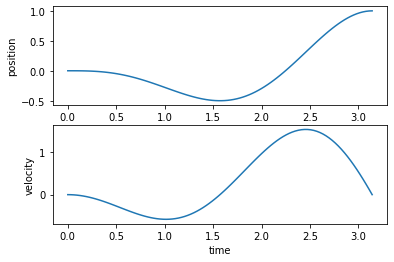

In [14]:
%matplotlib inline

fig, axs = plt.subplots(2, 1)
axs[0].plot(t,sol[:,0])
axs[0].set_ylabel('position')
axs[0].set_xlabel('time')
axs[1].plot(t,sol[:,1])
axs[1].set_ylabel('velocity')
axs[1].set_xlabel('time')

plt.show()

### 4) Consider the linear system in exercise 2.74 (pick c=750). Determine numerically if this system is controllable.

Consider the system 
$$\Large \dot x = \begin{bmatrix} 0 & 1 & 0&0\\ -\frac{k_1}{m_1} & -\frac{c}{m_1}&\frac{k_1}{m_1}&\frac{c}{m_1} \\0 & 0& 0&1\\ \frac{k_1}{m_2} & \frac{c}{m_2}&-\frac{k_1+k_2}{m_2}&-\frac{c}{m_2} \end{bmatrix} x + \begin{pmatrix} 0 \\ 0\\0\\\frac{k_2}{m_2}\end{pmatrix} u.$$

In [15]:
import numpy as np
m1 = 375
m2 = 30
k1 = 1500
k2 = 6500
c = 750
A = np.array([[0, 1, 0, 0], 
    [-k1/m1, -c/m1, k1/m1, c/m1],
    [0, 0, 0, 1],
    [k1/m2, c/m2, -(k1+k2)/m2, -c/m2]])
BT = np.array([[0,0,0,k2/m2]])
### Controllability matrix
C = np.block([[BT.T, A@BT.T, A@A@BT.T, A@A@A@BT.T]])
print(C)

[[ 0.00000000e+00  0.00000000e+00  4.33333333e+02 -1.08333333e+04]
 [ 0.00000000e+00  4.33333333e+02 -1.08333333e+04  1.75211111e+05]
 [ 0.00000000e+00  2.16666667e+02 -5.41666667e+03  8.84722222e+04]
 [ 2.16666667e+02 -5.41666667e+03  8.84722222e+04 -1.01652778e+06]]


In [16]:
from scipy import linalg
U, S, VT = linalg.svd(C, full_matrices = False)
print(S)

[1.03920739e+06 4.91985520e+03 3.48993599e+00 1.97613397e+00]


In [17]:
### Count the number of non-zero sigular value
count = 0
for s in S:
    if np.abs(s-0)>10**(-5):
        count+=1
print(count)

4


Since the number of non-zero sigular value is 4, the rank of controllability matrix C is 4. That implies controllability matrix has full rank. Therefore, this system is controllable.

### 3.2 Consider the state equation 
$$\Large \dot x = \begin{bmatrix} -1/2 & 0  \\ 0 & -1 \end{bmatrix} x + \begin{pmatrix} 1/2 \\ 1 \end{pmatrix} u.$$

We seek for a control which drives the state $(a,b)$ to the state $ (0,0) $ in $T$.

In this case the matrix exponential is given by
$$\Phi(s,0) = e^{As} = \begin{pmatrix} e^{-s/2} & 0 \\ 0 & e^-s \end{pmatrix}$$.
The state transition matrix:
$$\Phi(0,s) = \Phi(s,0)^{-1}= e^{As} = \begin{pmatrix} e^{s/2} & 0 \\ 0 & e^s \end{pmatrix}$$.
Thus we may compute
$$ \Phi(0,s)B = \begin{pmatrix} \frac{1}{2}e^{\frac{s}{2}} \\ e^s \end{pmatrix}$$.
This implies that the controllability Grammian is given by
$$W_c(0,T) = \int_0^{T} \begin{pmatrix} \frac{1}{4}(e^\tau) & \frac{1}{2}e^{\frac{3}{2}\tau} \\ \frac{1}{2}e^{\frac{3}{2}\tau} & e^{2\tau}\end{pmatrix} \,d\tau = \begin{pmatrix} \frac{1}{4}(e^T - 1) & \frac{1}{3}e^{\frac{3}{2}T} - 1 \\ \frac{1}{3}e^{\frac{3}{2}T} - 1 & \frac{1}{2}e^{2T}-1 \end{pmatrix}.
$$
In turn we use the formulas
$$
W_c \eta = x_0 = (a,b),\qquad u(t) = -B^T \Phi^T(0,t) \eta = -B^T \Phi^T(0,t) W_c^{-1}(0,T)\begin{pmatrix} a \\ b \end{pmatrix}.
$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

a = 5
b = -5
x_0 = np.array([a,b])
n = 100 ## number of step
B = np.array([1/2, 1])



In [23]:
def RHS(y, t):
    
    A = np.array([[-1/2,0],[0,-1]])
    
    B = np.array([1/2, 1])
    
    Phi = np.array([[np.e**(t/2),0],[0,np.e**t]])
    
    W_c = np.array([[1/4*(np.e**T -1), 1/3*(np.e**(3/2*T)-1)],[1/3*(np.e**(3/2*T)-1),1/2*(np.e**(2*T) -1)]])
    
    u = -B@np.transpose(Phi)@np.linalg.inv(W_c)@x_0.T
    
    dydt = A.dot(y) + B*u
    return dydt

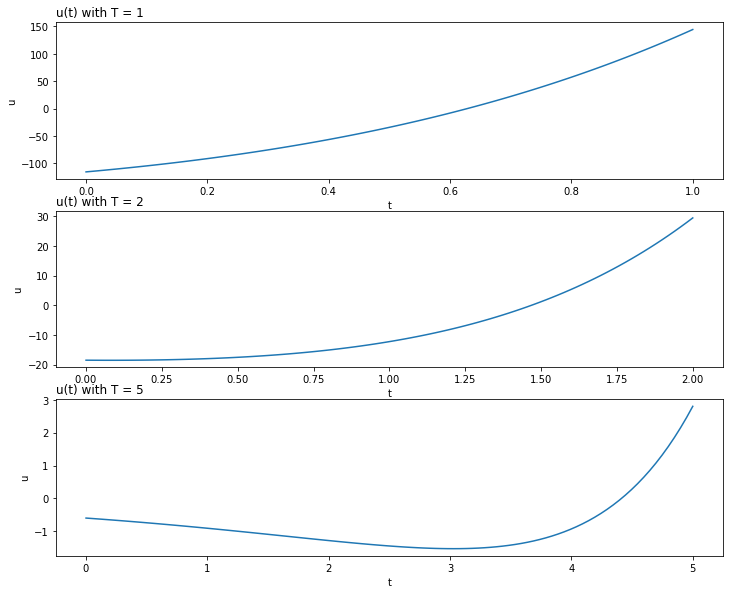

In [41]:
T_lst = [1,2,5]
f, axarray = plt.subplots(3,1,figsize=(10, 8))
f.tight_layout()
for T,ax in zip(T_lst,axarray.flatten()):
    t = np.linspace(0,T,n)
    u_lst = []
    for i in t:
        Phi = np.array([[np.e**(i/2),0],[0,np.e**i]])
    
        W_c = np.array([[1/4*(np.e**T -1), 1/3*(np.e**(3/2*T)-1)],[1/3*(np.e**(3/2*T)-1),1/2*(np.e**(2*T) -1)]])
    
        u = -B@np.transpose(Phi)@np.linalg.inv(W_c)@x_0.T
        u_lst.append(u)
        
    ax.plot(t,u_lst)
    ax.set_ylabel('u')
    ax.set_xlabel('t')
    ax.set_title('u(t) with T = ' + str(T),loc='left')


The magnitude of input $u(t)$ is decreasing as the reqired time raising. 

<ipython-input-39-eed290f5527c>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


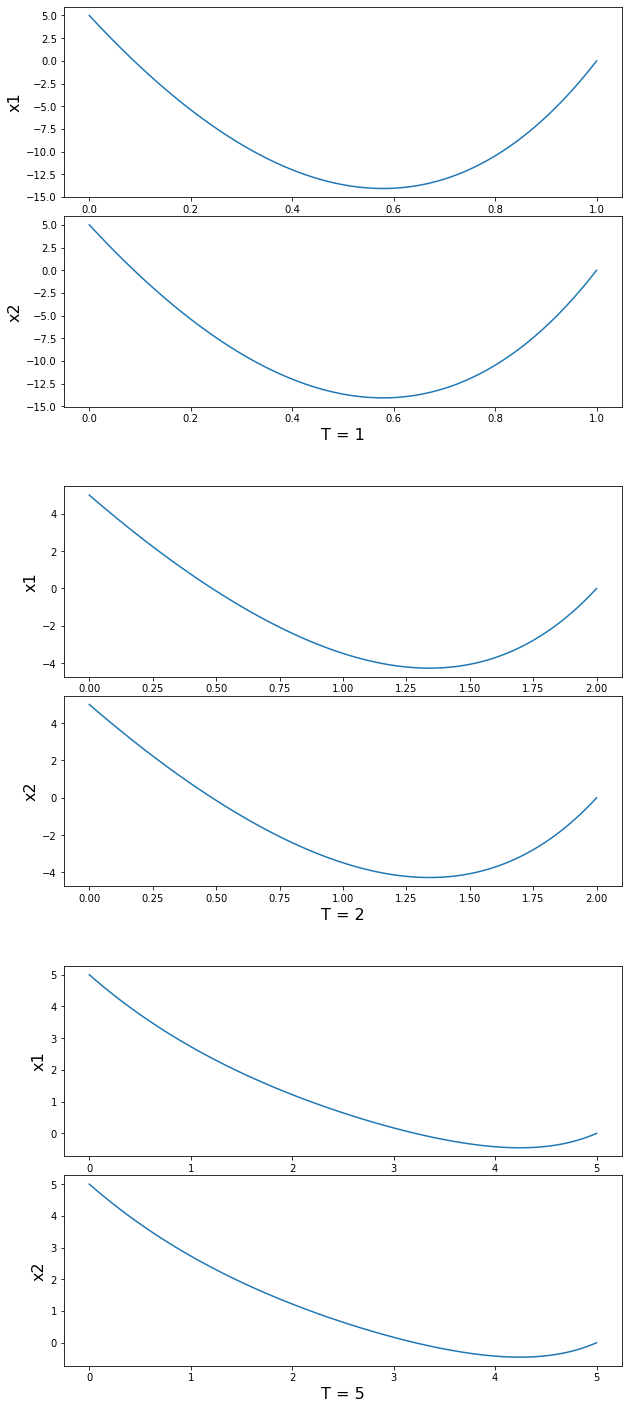

In [39]:
from scipy.integrate import odeint

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 25))
fig.tight_layout()
outer = gridspec.GridSpec(3, 1, wspace=0.2, hspace=0.2)

for i in range(3):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    T = T_lst[i]
    t = np.linspace(0,T,n)

    y0 = np.array([a,b])

    sol = odeint(RHS, y0, t)
    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        
        ax.plot(t,sol[:,0])
        ax.set_ylabel('x'+str(j+1),fontsize = 16)
        ax.set_xlabel('T = '+str(T),fontsize = 16)
        fig.add_subplot(ax)

fig.show()
